In [4]:
import pandas as pd 
import seaborn as sns 
import os 
import numpy as np 

I use data pulled from [this](https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv) dataset to do some simple visualizations to populate this repo. 

In [5]:
df = pd.read_table('https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv',sep=',')

In [7]:
df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [8]:
# wanting to see what airlines have '*' included in their names  
df.airline.unique()

array(['Aer Lingus', 'Aeroflot*', 'Aerolineas Argentinas', 'Aeromexico*',
       'Air Canada', 'Air France', 'Air India*', 'Air New Zealand*',
       'Alaska Airlines*', 'Alitalia', 'All Nippon Airways', 'American*',
       'Austrian Airlines', 'Avianca', 'British Airways*',
       'Cathay Pacific*', 'China Airlines', 'Condor', 'COPA',
       'Delta / Northwest*', 'Egyptair', 'El Al', 'Ethiopian Airlines',
       'Finnair', 'Garuda Indonesia', 'Gulf Air', 'Hawaiian Airlines',
       'Iberia', 'Japan Airlines', 'Kenya Airways', 'KLM*', 'Korean Air',
       'LAN Airlines', 'Lufthansa*', 'Malaysia Airlines',
       'Pakistan International', 'Philippine Airlines', 'Qantas*',
       'Royal Air Maroc', 'SAS*', 'Saudi Arabian', 'Singapore Airlines',
       'South African', 'Southwest Airlines', 'Sri Lankan / AirLanka',
       'SWISS*', 'TACA', 'TAM', 'TAP - Air Portugal', 'Thai Airways',
       'Turkish Airlines', 'United / Continental*',
       'US Airways / America West*', 'Vietnam Airlines

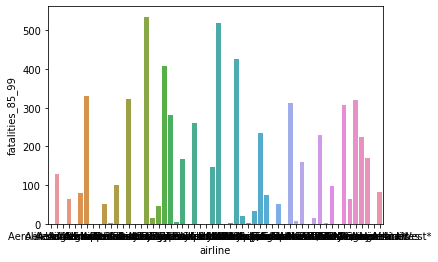

In [26]:
# barplot of fatalities by airline for 85-99 - only pull off top values for this viz 
sns.barplot(df.airline,df.fatalities_85_99)

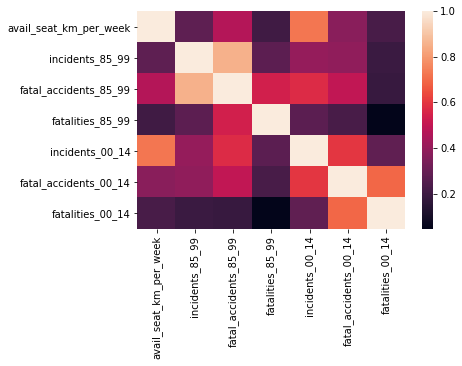

In [15]:
# correlation heatmap
sns.heatmap(df.corr(method='pearson'))